# Tutorial,  Neural Network to predict house prices 

We will be exploring how to use a package called Keras to build our first neural network to predict if house prices are above or below median value. In particular, we will go through the full Deep Learning pipeline, from:

* Exploring and Processing the Data
* Building and Training our Neural Network
* Visualizing Loss and Accuracy
* Adding Regularization to our Neural Network

# Python libraries:

- Keras 
- tensorflow 
- pandas
- scikit-learn 
- matplotlib

If you need help installing the package, follow the instructions in the link 
https://medium.com/intuitive-deep-learning/getting-started-with-python-for-deep-learning-and-data-science-9ca785560bbc 

# Dataset 

The dataset we will use today is adapted from Zillow’s Home Value Prediction Kaggle competition data
this data is reduced to by Joseph Lee  and we are using the reduced version of this data


use the following link to download all the dataset you need for the Feadforward NN and CNN tutorials https://drive.google.com/open?id=1WyVx96kIL72mDTsLJ-U5wAxDt0iBAX5O  



# Exploring the dataset 

Read in the CSV (comma separated values) file and convert them to arrays. Arrays are a data format that our algorithm can process.

Split our dataset into the input features (which we call x) and the label (which we call y).

Scale the data (we call this normalization) so that the input features have similar orders of magnitude.

Split our dataset into the training set, the validation set and the test set.

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('housepricedata.csv')

#makesure you put the link to where you downloaded the housepricedata.csv file location above. you can find this file inside the deep neural network.  

To see how the dataframe looks type df, which is the name of the parameter we saved above

In [5]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


Here, you can explore the data a little. We have our input features in the first ten columns:

* Lot Area (in sq ft)

* Overall Quality (scale from 1 to 10)

* Overall Condition (scale from 1 to 10)

* Total Basement Area (in sq ft)

* Number of Full Bathrooms

* Number of Half Bathrooms

* Number of Bedrooms above ground

* Total Number of Rooms above ground

* Number of Fireplaces

* Garage Area (in sq ft)

In our last column, we have the feature that we would like to predict:

Is the house price above the median or not? (1 for yes and 0 for no)


Now that we’ve seen what our data looks like, we want to convert it into arrays for our machine to process:

In [6]:
dataset = df.values

To convert our dataframe into an array, we just store the values of df (by accessing df.values) into the variable ‘dataset’. To see what is inside this variable ‘dataset’, simply type ‘dataset’ into a grey box on your notebook and run the cell (Alt-Enter):

In [7]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

As you can see, it is all stored in an array now:

We now split our dataset into input features (X) and the feature we wish to predict (Y). To do that split, we simply assign the first 10 columns of our array to a variable called X and the last column of our array to a variable called Y. The code to do the first assignment is this

In [8]:
X = dataset[:,0:10]

This might look a bit weird, but let me explain what’s inside the square brackets. Everything before the comma refers to the rows of the array and everything after the comma refers to the columns of the arrays.

Since we’re not splitting up the rows, we put a colon ‘:’ before the comma. This means to take all the rows in dataset and put it in X.

We want to extract the first 10 columns, and so the ‘0:10’ after the comma means take columns 0 to 9 and put it in X (we don’t include column 10). Our columns start from index 0, so the first 10 columns are really columns 0 to 9.

In [9]:
dataset[0,0]

8450

We then assign the last column of our array to Y:

In [10]:
Y = dataset[:,10]

Ok, now we’ve split our dataset into input features (X) and the label of what we want to predict (Y).

The next step in our processing is to make sure that the scale of the input features are similar. Right now, features such as lot area are in the order of the thousands, a score for overall quality is ranged from 1 to 10, and the number of fireplaces tend to be 0, 1 or 2.


In [11]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


This makes it difficult for the initialization of the neural network, which causes some practical problems. One way to scale the data is to use an existing package from scikit-learn.

We first have to import the code that we want to use:

In [12]:
from sklearn import preprocessing

This says that I want to use the code in ‘preprocessing’ within the sklearn package. Then, we use a function called the min_max_scaler, which scales the dataset so that all the input features lie between 0 and 1 inclusive, note that we chose 0 and 1 intentionally to aid the training of our neural network, but I won’t go through the theory behind this.:

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

 Now, our scaled dataset is stored in the array ‘X_scale’. If you wish to see what ‘X_scale’ looks like, simply run the cell:

In [14]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

Now, we are down to our last step in processing the data, which is to split our dataset into a training set to train our networks, a validation set to validate the performance after each iteration of training and a test set to evaluate the final model.

We will use the code from scikit-learn called ‘train_test_split’, which as the name suggests, split our dataset into a training set and a test set. We first import the code we need:

In [15]:
from sklearn.model_selection import train_test_split

Then, split your dataset like this:

In [16]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

This tells scikit-learn that the size of your validation set and test set will be 30% of the overall dataset. The code will store the split data into the first four variables on the left of the equal sign as the variable names suggest.

Unfortunately, this function only helps us split our dataset into two. Since we want a separate validation set and test set, we can use the same function to do the split again on the parameter val_and_test:

In [17]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

The code above will split the val_and_test equally into the validation set and the test set.

In summary, we now have a total of six variables for our datasets:

* X_train (10 input features, 70% of full dataset)

* X_val (10 input features, 15% of full dataset)

* X_test (10 input features, 15% of full dataset)

* Y_train (1 label, 70% of full dataset)

* Y_val (1 label, 15% of full dataset)

* Y_test (1 label, 15% of full dataset)

If you want to see how the shapes of the arrays are for each of them (i.e. what dimensions they are), simply run

In [18]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


As you can see, the training set has 1022 data points while the validation and test set has 219 data points each. The X variables have 10 input features, while the Y variables only has one feature to predict.

And now, our data is finally ready! 

# Building and Training our First Neural Network

Machine Learning consists of two steps. The first step is to specify a template (an architecture) and the second step is to find the best numbers (parameters) based on the data to fill in that template. Our code from here on will also follow these two steps.

# Step one: Setting up the Architecture

The first thing we have to do is to set up the architecture. Let’s first think about what kind of neural network architecture we want. Suppose we want this neural network:

In words, we want to have these layers:

* Hidden layer 1: 32 neurons, ReLU activation
    
* Hidden layer 2: 32 neurons, ReLU activation
    
* Output Layer: 1 neuron, Sigmoid activation
    
Now, we need to describe this architecture to Keras. We will be using the Sequential model to do this.

First, let’s import the necessary code from Keras:

In [34]:
import tensorflow as tf


from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Activation, Dense


ImportError: cannot import name 'builder' from 'google.protobuf.internal' (/Users/hauwabako/opt/anaconda3/lib/python3.9/site-packages/google/protobuf/internal/__init__.py)

In Keras, we need to specify that our sequential model like this:

In [31]:
model = Sequential([Dense(32, activation='relu', input_shape=(10,)),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid'),
                    ])

NameError: name 'Sequential' is not defined

The code snippet above has defined our architecture! The code above can be interpreted like this:
        
        model = Sequential([ ... ])

This says that we will store our model in the variable ‘model’, and we’ll describe it sequentially (layer by layer) in between the square brackets.

        Dense(32, activation='relu', input_shape=(10,)),

We have our first layer as a dense layer with 32 neurons, ReLU activation and the input shape is 10 since we have 10 input features. Note that ‘Dense’ refers to a fully-connected layer, which is what we will be using.

        Dense(32, activation='relu'),

Our second layer is also a dense layer with 32 neurons, ReLU activation. Note that we do not have to describe the input shape since Keras can infer from the output of our first layer.

        Dense(1, activation='sigmoid'),

Our third layer is a dense layer with 1 neuron, sigmoid activation.

And just like that, we have written our model architecture (template) in code!


# Step Two, Filling in the best numbers


Now that we’ve got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by:

* Telling it which algorithm you want to use to do the optimization

* Telling it what loss function to use

* Telling it what other metrics you want to track apart from the loss function

Configuring the model with these settings requires us to call the function model.compile, like this:

In [19]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

We put the following settings inside the brackets after model.compile:

    optimizer='sgd'

‘sgd’ refers to stochastic gradient descent


    loss='binary_crossentropy'

The loss function for outputs that take the values 1 or 0 is called binary cross entropy.

    metrics=['accuracy']

Lastly, we want to track accuracy on top of the loss function.

Now once we’ve run that cell, we are ready to train!

Training on the data is pretty straightforward and requires us to write one line of code:

The function is called ‘fit’ as we are fitting the parameters to the data. We have to specify what data we are training on, which is X_train and Y_train. Then, we specify the size of our mini-batch and how long we want to train it for (epochs). Lastly, we specify what our validation data is so that the model will tell us how we are doing on the validation data at each point. This function will output a history, which we save under the variable 'hist'. We’ll use this variable a little later when we get to visualization.

In [20]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 15ms/step - loss: 0.7048 - accuracy: 0.4032 - val_loss: 0.6945 - val_accuracy: 0.5114
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4382 - val_loss: 0.6913 - val_accuracy: 0.5160
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5019 - val_loss: 0.6884 - val_accuracy: 0.6119
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5967 - val_loss: 0.6858 - val_accuracy: 0.6347
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.6224 - val_loss: 0.6828 - val_accuracy: 0.6575
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.6414 - val_loss: 0.6796 - val_accuracy: 0.6849
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.6580 - val_loss: 0.6759 - val_accuracy: 0.6895
Epoch 8/100


You can now see that the model is training! By looking at the numbers, you should be able to see the loss decrease and the accuracy increase over time. At this point, you can experiment with the hyper-parameters and neural network architecture. Run the cells again to see how your training has changed when you’ve tweaked your hyperparameters.

Once you’re happy with your final model, we can evaluate it on the test set. To find the accuracy on our test set, we run this code snippet

In [21]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2949 - accuracy: 0.8858


0.8858447670936584

The reason why we have the index 1 after the model.evaluate function is because the function returns the loss as the first element and the accuracy as the second element. To only output the accuracy, simply access the second element (which is indexed by 1, since the first element starts its indexing from 0).

Due to the randomness in how we have split the dataset as well as the initialization of the weights, the numbers and graph will differ slightly each time we run our notebook. Nevertheless, you should get a test accuracy anywhere between 80% to 95% if you’ve followed the architecture I specified above!

# Visualizing Loss and Accuracy

How do we know if our model is currently overfitting?

What we might want to do is to plot the training loss and the val loss over the number of epochs passed. To display some nice graphs, we will use the package matplotlib. As usual, we have to import the code we wish to use



In [22]:
import matplotlib.pyplot as plt

Then, we want to visualize the training loss and the validation loss. To do so, run this snippet of code

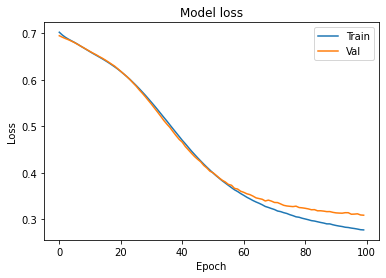

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

We can also visualize the training accuracy and the validation accuracy like this

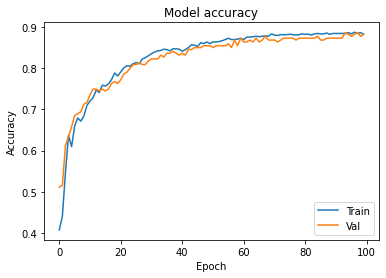

In [24]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

as you can see the model is not over fit. 

the primary aim of machine learning model is to learn general concepts from the input data. then this general concept will be used to classify a new dataset as per the general concept learned from the model. 

if the model learns in detail about each specific training data, then the model can accuratly classify the training data but the model will have very low accuracy on the validation data or any data outside of the training input.

ploting the graph of accuracy and loss will show us whether our data is over fit or not. 


in our graph above we can see that the model is working fairly well for both the training data and validation data.
thus we can say that it is a good model. 


if you want to learn about model overfitting and underfitting, here is a link to definitions and examples 
https://en.wikipedia.org/wiki/Overfitting  

# Example of overfit model

now lets add more hidden layers with a 1000 neurons each to our data so that it will learn details about our training data and see how it will perform on the validating data 


we will use the same dataset as before but we will change our model structure as follows, 
 lets call the new model 'model_2':


In [25]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 38ms/step - loss: 0.5477 - accuracy: 0.7004 - val_loss: 0.3450 - val_accuracy: 0.8676
Epoch 2/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3059 - accuracy: 0.8666 - val_loss: 0.3235 - val_accuracy: 0.8950
Epoch 3/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2748 - accuracy: 0.8847 - val_loss: 0.4182 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 1s 33ms/step - loss: 0.2812 - accuracy: 0.8760 - val_loss: 0.3238 - val_accuracy: 0.8813
Epoch 5/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2638 - accuracy: 0.8736 - val_loss: 0.3674 - val_accuracy: 0.8128
Epoch 6/100
32/32 [==============================] - 1s 33ms/step - loss: 0.2995 - accuracy: 0.8712 - val_loss: 0.2960 - val_accuracy: 0.9041
Epoch 7/100
32/32 [==============================] - 1s 33ms/step - loss: 0.2226 - accuracy: 0.9053 - val_loss: 0.4335 - val_accuracy: 0.8447
Epoch 

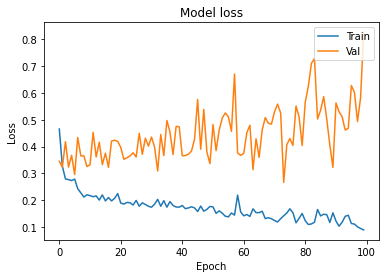

In [26]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

as you can see from the plot, the model learns detail concepts of the training data and the loss on the training is closer to zero, however, when you look at the loss on the validation, the model doesn't do well. this is the sign of overfitting model. 

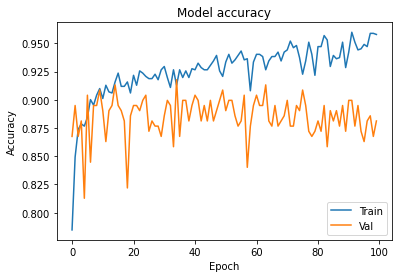

In [27]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

also looking at the accuracy graph tells us the model accuracy on the training is almost close to 1, however the model accuracy on the validation doesn't seem to move after the 10th epoch. this is again a sign of overfitting model

# How to mitigate Overfiting model

To address the overfitting we saw in Model 2, we'll incorporate L2 regularization and dropout in our third model here (Model 3)

In [28]:
from keras.layers import Dropout
from keras import regularizers

In [29]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [30]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 46ms/step - loss: 21.1141 - accuracy: 0.5334 - val_loss: 3.9347 - val_accuracy: 0.7580
Epoch 2/100
32/32 [==============================] - 1s 40ms/step - loss: 2.5101 - accuracy: 0.8271 - val_loss: 0.6660 - val_accuracy: 0.8767
Epoch 3/100
32/32 [==============================] - 1s 41ms/step - loss: 0.5921 - accuracy: 0.8739 - val_loss: 0.6214 - val_accuracy: 0.8174
Epoch 4/100
32/32 [==============================] - 1s 41ms/step - loss: 0.5652 - accuracy: 0.8481 - val_loss: 0.5871 - val_accuracy: 0.8311
Epoch 5/100
32/32 [==============================] - 1s 41ms/step - loss: 0.4961 - accuracy: 0.8542 - val_loss: 0.4788 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 1s 40ms/step - loss: 0.4535 - accuracy: 0.8920 - val_loss: 0.5613 - val_accuracy: 0.8265
Epoch 7/100
32/32 [==============================] - 1s 42ms/step - loss: 0.4824 - accuracy: 0.8708 - val_loss: 0.5603 - val_accuracy: 0.8311
Epoch

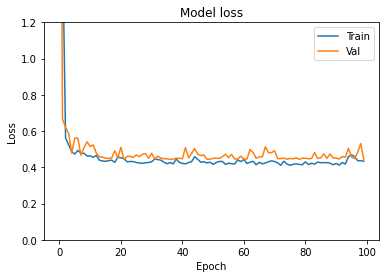

In [31]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

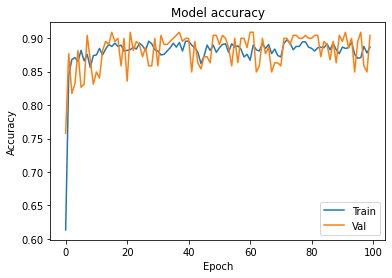

In [32]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Apparently, there is no overfitting issue after adding dropout to the hidden layers, but the overall accuracy of model_3 is lower compared to our first moder with only 2 hidden layers. 

# Home work 

Can you change the structure of the model so that the accuracy on the validation reaches 93% or above. 

reference. Joseph Lee Wei En, freecodecamp.org

In [ ]:
model_hw = Sequential([
                      # add code here   
])